   year  month  average  Last_month1  Last_month2  Last_month3  Last_month4  \
0  1958      8   314.93       315.86       317.24       317.51       317.45   
1  1958      9   313.20       314.93       315.86       317.24       317.51   
2  1958     10   312.43       313.20       314.93       315.86       317.24   
3  1958     11   313.33       312.43       313.20       314.93       315.86   
4  1958     12   314.67       313.33       312.43       313.20       314.93   

   Last_month5  
0       315.70  
1       317.45  
2       317.51  
3       317.24  
4       315.86  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MLP RMSE: 1.1533178568202045


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

MA RMSE: 32.932849144237395


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA RMSE: 32.92696176648086


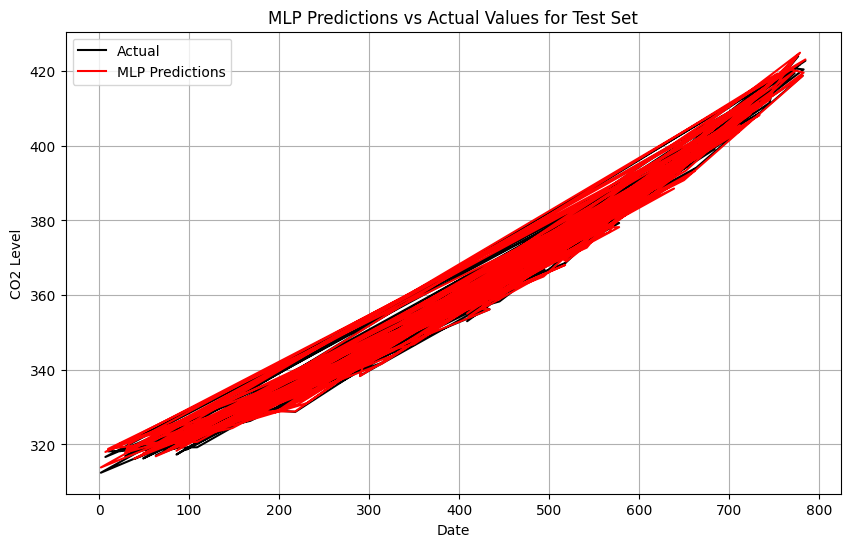

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

df = pd.read_csv('co2_mm_mlo.csv', comment='#')

K = 5  # Previous 5 months
T = 1

# Extract required columns
df = df[['year', 'month', 'average']]

for i in range(1, K+1):  # For past 5 months
    df[f'Last_month{i}'] = df['average'].shift(i)

df = df.drop(df.index[:5]).reset_index(drop=True)
print(df[:5])

X = df[['Last_month1', 'Last_month2','Last_month3','Last_month4','Last_month5']]
Y = df[['average']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, Y_train)
mlp_predictions = mlp.predict(X_test_scaled)

mlp_rmse = np.sqrt(mean_squared_error(Y_test, mlp_predictions))
print(f'MLP RMSE: {mlp_rmse}')

ma_model = sm.tsa.statespace.SARIMAX(Y_train, order=(0, 0, 5), trend='c')
ma_results = ma_model.fit()
ma_predictions = ma_results.predict(start=len(Y_train), end=len(Y_train)+len(Y_test)-1, dynamic=False)

ma_rmse = np.sqrt(mean_squared_error(Y_test, ma_predictions))
print(f'MA RMSE: {ma_rmse}')

arima_model = sm.tsa.ARIMA(Y_train, order=(5, 0, 0))  # ARIMA(p, d, q) with d=0 for ARMA
arima_results = arima_model.fit()
arima_predictions = arima_results.predict(start=len(Y_train), end=len(Y_train)+len(Y_test)-1)

arima_rmse = np.sqrt(mean_squared_error(Y_test, arima_predictions))
print(f'ARIMA RMSE: {arima_rmse}')

import matplotlib.pyplot as plt

# Plot predictions vs actual values for test set
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual', color='black')
plt.plot(Y_test.index, mlp_predictions, label='MLP Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.title('MLP Predictions vs Actual Values for Test Set')
plt.legend()
plt.grid(True)
plt.show()



